In [1]:
import pandas as pd
import matplotlib.pyplot as plt

DEV_COL_NAMES = [
    "empathy",
    "distress",
    "emotion",
    "personality_conscientiousness",
    "personality_openess",
    "personality_extraversion",
    "personality_agreeableness",
    "personality_stability",
    "iri_perspective_taking",
    "iri_personal_distress",
    "iri_fantasy",
    "iri_empathatic_concern"
]

# wassa22 train e dev
train_22 = pd.read_csv('datasets/WASSA22_essay_level_train.tsv', sep='\t')
dev_22 = pd.read_csv('datasets/WASSA22_essay_level_dev.tsv', sep='\t')
dev_22_lbl = pd.read_csv('datasets/WASSA22_goldstandard_dev.tsv', sep='\t', names=DEV_COL_NAMES)

In [2]:
dev_22 = dev_22.merge(dev_22_lbl, left_index=True, right_index=True, how='outer')
dev_22.head()

,message_id,response_id,article_id,essay,gender,education,race,age,income,empathy,...,emotion,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,R_3QLVVnAgRBRH41U_1,R_3QLVVnAgRBRH41U,13,The story about the air strikes is very sadden...,1.0,4.0,3.0,20.0,24000.0,7.000,...,sadness,5.5,5.5,4.0,5.0,4.5,4.429,2.286,4.143,3.143
1,R_3QLVVnAgRBRH41U_2,R_3QLVVnAgRBRH41U,127,It is clear that climate change is something t...,1.0,4.0,3.0,20.0,24000.0,3.167,...,sadness,5.5,5.5,4.0,5.0,4.5,4.429,2.286,4.143,3.143
2,R_3QLVVnAgRBRH41U_3,R_3QLVVnAgRBRH41U,188,I did not know this comedian but thinking abou...,1.0,4.0,3.0,20.0,24000.0,4.500,...,fear,5.5,5.5,4.0,5.0,4.5,4.429,2.286,4.143,3.143
3,R_3QLVVnAgRBRH41U_4,R_3QLVVnAgRBRH41U,307,I am an affirmed believer that your punishment...,1.0,4.0,3.0,20.0,24000.0,2.000,...,anger,5.5,5.5,4.0,5.0,4.5,4.429,2.286,4.143,3.143
4,R_3QLVVnAgRBRH41U_5,R_3QLVVnAgRBRH41U,409,"Okay, I hate hearing about disease outbreaks. ...",1.0,4.0,3.0,20.0,24000.0,4.500,...,anger,5.5,5.5,4.0,5.0,4.5,4.429,2.286,4.143,3.143


In [3]:
data_22 = pd.concat([train_22, dev_22], ignore_index=True)
data_22

,message_id,response_id,article_id,empathy,distress,empathy_bin,distress_bin,essay,emotion,gender,...,income,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,R_1hGrPtWM4SumG0U_1,R_1hGrPtWM4SumG0U,67,5.667,4.375,1.0,1.0,it is really diheartening to read about these ...,sadness,1.0,...,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
1,R_1hGrPtWM4SumG0U_2,R_1hGrPtWM4SumG0U,86,4.833,4.875,1.0,1.0,the phone lines from the suicide prevention li...,sadness,1.0,...,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
2,R_1hGrPtWM4SumG0U_3,R_1hGrPtWM4SumG0U,206,5.333,3.500,1.0,0.0,"no matter what your heritage, you should be ab...",neutral,1.0,...,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
3,R_1hGrPtWM4SumG0U_4,R_1hGrPtWM4SumG0U,290,4.167,5.250,1.0,1.0,it is frightening to learn about all these sha...,fear,1.0,...,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
4,R_1hGrPtWM4SumG0U_5,R_1hGrPtWM4SumG0U,342,5.333,4.625,1.0,1.0,the eldest generation of russians aren't being...,sadness,1.0,...,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,R_r3CoQ7YjIwxVvJT_1,R_r3CoQ7YjIwxVvJT,2,2.000,2.250,NaN,NaN,"While I feel bad for the arrest charges, I don...",anger,2.0,...,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286
2126,R_r3CoQ7YjIwxVvJT_2,R_r3CoQ7YjIwxVvJT,131,4.500,5.625,NaN,NaN,This is such a tragedy. All I can think about...,fear,2.0,...,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286
2127,R_r3CoQ7YjIwxVvJT_3,R_r3CoQ7YjIwxVvJT,230,1.833,2.375,NaN,NaN,I'm still on the fence regarding climate chang...,neutral,2.0,...,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286
2128,R_r3CoQ7YjIwxVvJT_4,R_r3CoQ7YjIwxVvJT,326,1.833,1.375,NaN,NaN,I can understand why the Jewish community woul...,joy,2.0,...,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286


In [4]:
data_22 = data_22[data_22['gender']!=5] # tolto gender 5.0

In [5]:
internal_train_23 = pd.read_csv('datasets/WASSA23_essay_level_internal_train_preproc.tsv', sep='\t')
internal_train_23 = internal_train_23[['essay', 'emotion', 'empathy', 'distress', 'gender', 'education', 'race', 'age', 'income', 'personality_conscientiousness', 'personality_openess', 'personality_extraversion', 'personality_agreeableness', 'personality_stability', 'iri_perspective_taking', 'iri_personal_distress', 'iri_fantasy', 'iri_empathatic_concern']]
internal_train_23

,essay,emotion,empathy,distress,gender,education,race,age,income,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,It's so sad the turning event of Immigrants st...,Hope/Sadness,6.333333,6.125,1,7,1,46,150000,3.50,4.00,4.00,5.00,3.0,3.286,3.8570,3.000,2.857
1,I feel bad for the mother and her two daughter...,Hope/Sadness,6.500000,2.875,1,6,3,37,40000,7.00,5.50,1.00,6.50,6.0,4.857,2.0000,3.429,5.000
2,I feel so bad for the victims and the victims ...,Hope/Sadness,6.000000,6.000,2,3,1,27,25000,6.00,6.00,6.00,6.00,6.0,4.000,2.2860,3.571,3.714
3,"One of the biggest fears of a parent, is that ...",Hope/Sadness,6.666667,6.375,1,6,3,37,40000,7.00,5.50,1.00,6.50,6.0,4.857,2.0000,3.429,5.000
4,I feel sorry for the people living in that reg...,Hope/Sadness,6.666667,6.625,1,6,3,37,40000,7.00,5.50,1.00,6.50,6.0,4.857,2.0000,3.429,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,Reading about the situation in Syria is always...,Sadness/Surprise,4.000000,3.125,1,4,1,29,39000,6.00,6.50,1.00,6.00,5.5,5.000,2.2860,3.286,4.143
613,I just read about an unfortunate wolf that had...,Disgust/Surprise,5.833333,4.750,1,4,1,29,39000,6.00,6.50,1.00,6.00,5.5,5.000,2.2860,3.286,4.143
614,I had to read this article over twice because ...,Disgust/Surprise,6.166667,6.000,1,6,2,32,35000,5.50,5.00,2.00,5.50,4.5,3.429,2.8570,2.857,2.714
615,I just read an article about the amount of foo...,Disgust/Surprise,1.000000,2.625,1,4,1,29,39000,6.00,6.50,1.00,6.00,5.5,5.000,2.2860,3.286,4.143


In [6]:
data_22 = data_22.drop(['message_id', 'response_id', 'article_id', 'empathy_bin', 'distress_bin'], axis=1)
data_22.columns

Index(['empathy', 'distress', 'essay', 'emotion', 'gender', 'education',
       'race', 'age', 'income', 'personality_conscientiousness',
       'personality_openess', 'personality_extraversion',
       'personality_agreeableness', 'personality_stability',
       'iri_perspective_taking', 'iri_personal_distress', 'iri_fantasy',
       'iri_empathatic_concern'],
      dtype='object')

In [7]:
# keep 210 sadness
count = 0
sadness_idx = []
for index, row in data_22.iterrows():
    if count > 210 and 'sadness' in row['emotion']:
        sadness_idx.append(index)
    elif 'sadness' in row['emotion']:
        count += 1
data_22 = data_22.drop(sadness_idx, axis=0)
data_22

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,5.667,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
1,4.833,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
2,5.333,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
3,4.167,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
4,5.333,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.0,5.0,5.0,5.5,5.5,3.571,2.000,3.429,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,4.167,3.500,I remember during a few hurricanes in the sout...,fear,2.0,4.0,1.0,36.0,72000.0,6.5,5.5,2.0,6.5,4.0,4.571,3.000,4.000,4.286
2125,2.000,2.250,"While I feel bad for the arrest charges, I don...",anger,2.0,2.0,1.0,37.0,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286
2126,4.500,5.625,This is such a tragedy. All I can think about...,fear,2.0,2.0,1.0,37.0,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286
2127,1.833,2.375,I'm still on the fence regarding climate chang...,neutral,2.0,2.0,1.0,37.0,93000.0,4.0,6.0,1.0,5.0,2.5,3.857,4.143,4.286,3.286


In [8]:
# merge wassa 22 con 23
data = pd.concat([data_22, internal_train_23], ignore_index=True)
data

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,personality_openess,personality_extraversion,personality_agreeableness,personality_stability,iri_perspective_taking,iri_personal_distress,iri_fantasy,iri_empathatic_concern
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,5.00,5.00,5.50,5.5,3.571,2.0000,3.429,4.000
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,5.00,5.00,5.50,5.5,3.571,2.0000,3.429,4.000
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,5.00,5.00,5.50,5.5,3.571,2.0000,3.429,4.000
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,5.00,5.00,5.50,5.5,3.571,2.0000,3.429,4.000
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,5.00,5.00,5.50,5.5,3.571,2.0000,3.429,4.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,4.000000,3.125,Reading about the situation in Syria is always...,Sadness/Surprise,1.0,4.0,1.0,29.0,39000.0,6.00,6.50,1.00,6.00,5.5,5.000,2.2860,3.286,4.143
2196,5.833333,4.750,I just read about an unfortunate wolf that had...,Disgust/Surprise,1.0,4.0,1.0,29.0,39000.0,6.00,6.50,1.00,6.00,5.5,5.000,2.2860,3.286,4.143
2197,6.166667,6.000,I had to read this article over twice because ...,Disgust/Surprise,1.0,6.0,2.0,32.0,35000.0,5.50,5.00,2.00,5.50,4.5,3.429,2.8570,2.857,2.714
2198,1.000000,2.625,I just read an article about the amount of foo...,Disgust/Surprise,1.0,4.0,1.0,29.0,39000.0,6.00,6.50,1.00,6.00,5.5,5.000,2.2860,3.286,4.143


In [9]:
emotions = set()
for perceived_emotion in data['emotion'].unique():
	for emotion in perceived_emotion.split('/'):
		emotions.add(emotion.lower())
emotions

{'anger', 'disgust', 'fear', 'hope', 'joy', 'neutral', 'sadness', 'surprise'}

In [10]:
for emotion in emotions:
    data[emotion] = data["emotion"].str.lower().str.contains(emotion).astype(int)
data

,empathy,distress,essay,emotion,gender,education,race,age,income,personality_conscientiousness,...,iri_fantasy,iri_empathatic_concern,anger,fear,surprise,disgust,sadness,neutral,hope,joy
0,5.667000,4.375,it is really diheartening to read about these ...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,0,0,0,1,0,0,0
1,4.833000,4.875,the phone lines from the suicide prevention li...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,0,0,0,1,0,0,0
2,5.333000,3.500,"no matter what your heritage, you should be ab...",neutral,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,0,0,0,0,1,0,0
3,4.167000,5.250,it is frightening to learn about all these sha...,fear,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,1,0,0,0,0,0,0
4,5.333000,4.625,the eldest generation of russians aren't being...,sadness,1.0,4.0,1.0,33.0,50000.0,6.00,...,3.429,4.000,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,4.000000,3.125,Reading about the situation in Syria is always...,Sadness/Surprise,1.0,4.0,1.0,29.0,39000.0,6.00,...,3.286,4.143,0,0,1,0,1,0,0,0
2196,5.833333,4.750,I just read about an unfortunate wolf that had...,Disgust/Surprise,1.0,4.0,1.0,29.0,39000.0,6.00,...,3.286,4.143,0,0,1,1,0,0,0,0
2197,6.166667,6.000,I had to read this article over twice because ...,Disgust/Surprise,1.0,6.0,2.0,32.0,35000.0,5.50,...,2.857,2.714,0,0,1,1,0,0,0,0
2198,1.000000,2.625,I just read an article about the amount of foo...,Disgust/Surprise,1.0,4.0,1.0,29.0,39000.0,6.00,...,3.286,4.143,0,0,1,1,0,0,0,0


C:\Users\giuli\AppData\Local\Temp\ipykernel_28268\3989765310.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data[emotions].sum().plot(kind='bar')


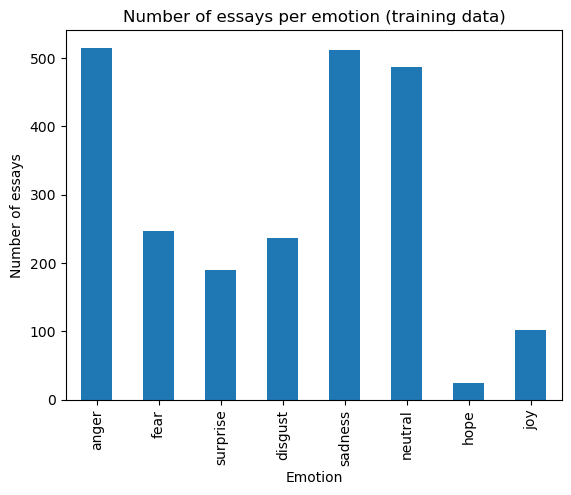

In [11]:
data[emotions].sum().plot(kind='bar')
plt.title('Number of essays per emotion (training data)')
plt.xlabel('Emotion')
plt.ylabel('Number of essays')
plt.show()

<Axes: title={'center': 'Number of essays per emotion for training data'}, xlabel='Emotion', ylabel='Number of essays'>

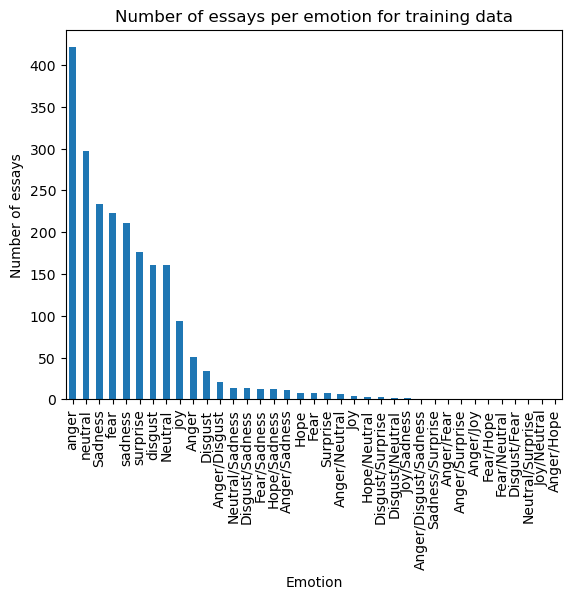

In [12]:
data['emotion'].value_counts().plot(kind='bar', title='Number of essays per emotion for training data', xlabel='Emotion', ylabel='Number of essays')

In [13]:
data.to_csv('datasets/WASSA22-23.tsv', sep='\t', index=False)

In [16]:
# Convert "age" and "income" column to numeric type
data_22['age'] = pd.to_numeric(data_22['age'], errors='coerce')
data_22['income'] = pd.to_numeric(data_22['income'], errors='coerce')

# Age and income bins
age_bins = [20, 30, 40, 50, 60, 70]  # Define the desired age bins
income_bins = [1000, 10000, 30000, 50000, 70000, 90000]  # Define the desired income bins

# Compute counts for age and income bins

In [17]:
# Count demographic categorical attributes
counts = {}
categorical_attributes = ['gender', 'education', 'race', 'age', 'income']
for attribute in categorical_attributes:
    counts[attribute] = data_22[attribute].value_counts().to_dict()


print(counts['gender']) # in {1, 2}
print(counts['education']) # in rage [1, 7]
print(counts['race']) # in rage [1, 6]

{1.0: 880, 2.0: 703}
{6.0: 701, 4.0: 372, 5.0: 177, 2.0: 169, 7.0: 131, 3.0: 33}
{1.0: 1186, 3.0: 161, 5.0: 103, 2.0: 97, 6.0: 21, 4.0: 15}


In [26]:
count=0
for idx, row in data.iterrows():
  if row['hope'] == 1:
    count +=1
    if count<13:
      print(row['essay'])
      print("-"*100)

It's so sad the turning event of Immigrants status on their affairs and protection. After reading an article on the latest happening in Germany. the well known home for immigrants now going tough I feel remorse and deep pain for those who really need Sanctuaries which Germany was well known to offer before. Hopefully things will turn around
----------------------------------------------------------------------------------------------------
I feel bad for the mother and her two daughters that died in the accident. I'm a person that worries and being in a trailer would have me worrying. It is very sad that their life were cut short because they wanted to enjoy sometime together and go for a ride on Halloween.  I hope that the other people involved in the crash find peace.
----------------------------------------------------------------------------------------------------
I feel so bad for the victims and the victims families. They were just doing there job and this careless explosion cau

In [24]:
count=0
for idx, row in data.iterrows():
  if row['hope'] == 1:
    count +=1
    if count>=13:
      print(row['essay'])
      print("-"*100)

Dear friend,                                          I have recently just read an article about a horrible shooting in Charlotte. It was a black man who was killed by the police. This is just one of many such cases unfortunately. I think there is a problem in this country and I hope that it can be solved one day.
----------------------------------------------------------------------------------------------------
I feel for both sides on this one. The police and people are trying to protect the sacred wild life and beings but also the village is probably needing the meat of the animal or the money from selling it as they are a very poor country. I can see being so desperate in a third world country that this would seem like the police are cutting off or taking your only source of livlihood. These poor guys however they are just trying to protect and do what is right they do not deserve to be so violently attacked im suprised they were able to live through such a brutal beating. I hope 

In [38]:
new_samples_path = "rephrased_irene.txt"
new_samples = pd.read_csv(new_samples_path, sep="\t", names=['essay'])
new_samples

,essay
0,The change in immigrants' status and their acc...
1,It is incredibly saddening to witness the shif...
2,The alteration in the status of immigrants and...
3,My heart aches for the mother and her two daug...
4,The plight of the mother and her two daughters...
...,...
73,The entirety of this situation is cause for al...
74,This entire circumstance is deeply concerning....
75,"The article is deeply unsettling, and my since..."
76,"This article is incredibly distressing, and I ..."


In [39]:
new_samples.iloc[0]['essay']

"The change in immigrants' status and their access to support and security is truly disheartening. Upon perusing an article about the recent developments in Germany, a renowned haven for immigrants, it becomes evident that the situation has become more challenging. This fills me with regret and profound sorrow for those individuals who genuinely require safe spaces, something Germany was previously renowned for providing. One can only hope that circumstances will improve."

In [44]:
new_hope_df = pd.DataFrame()
count=-1
for idx, row in data.iterrows():
  count+=1
  if row['hope'] == 1:
    for i in range(3):
      print((count*3)+1)
      essay = new_samples.iloc[(count*3)+i]['essay']
      new_hope_df = new_hope_df.append(row)

4750


IndexError: single positional indexer is out-of-bounds